DataSet 출처
https://www.dropbox.com/scl/fi/vxoq0s8f69em3jm8n774p/All-Age-Faces-Dataset.zip?rlkey=w1711nofchv38k3qaldt0ybkj&e=1&dl=0


https://github.com/JingchunCheng/All-Age-Faces-Dataset?tab=readme-ov-file#all-age-faces-dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')#드라이브 마운트
import os
import torch
import torchvision
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu') #GPU 할당
print(device)
from PIL import Image
import glob
import torch.nn as nn
import torch.optim as optim
import numpy as np
import random
from tqdm import tqdm
from torch.optim import optimizer
from torchvision import transforms
from torchvision import models
from torch.utils.data import Dataset, DataLoader
import cv2
import matplotlib.pyplot as plt
from IPython.display import Image,display
from google.colab import files


Mounted at /content/drive
cuda


In [ ]:
%cd /content/drive/MyDrive/Project

!unzip -qq "/content/drive/MyDrive/Project/All-Age-Faces Dataset.zip"

/content/drive/MyDrive/Project


In [ ]:
!pip install face-recognition
import face_recognition as fr

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.1/100.1 MB 22.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566164 sha256=868a98f161703a26544244b85989bcb4d03a98c05193cc0179f7e7b22cf147d5
  Stored in directory: /root/.cache/pip/wheels/7a/eb/cf/e9eced74122b679557f597bb7c8e4c739cfcac526db1fd523d
Successfully built face-recognition-models


In [ ]:
CFG = {
    'IMG_SIZE':128, #이미지 사이즈128
    'EPOCHS':100, #에포크
    'BATCH_SIZE':16, #배치사이즈
    'SEED':1, #시드
}

In [ ]:
def seed_everything(seed):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = True

seed_everything(CFG['SEED']) #시드고정 함수 선언후 시드고정

In [ ]:
train_path=sorted(glob.glob("/content/drive/MyDrive/Project/All-Age-Faces Dataset/original images/*.jpg")) #파일명으로 정렬후 list로 경로 가져오기기

In [ ]:
print(len(train_path))#총 데이터 갯수

13322


In [ ]:
train_transform = torchvision.transforms.Compose([
                    transforms.Resize([CFG['IMG_SIZE'], CFG['IMG_SIZE']]),#각 이미지 같은 크기로 resize
                    transforms.ToTensor(),#이미지를 텐서로 변환
                    transforms.Normalize(mean=(0.5, 0.5, 0.5), std=(0.5, 0.5, 0.5))#평균과 표준편차를 0.5로 정규화
                    ])

test_transform = torchvision.transforms.Compose([
                    transforms.Resize([CFG['IMG_SIZE'], CFG['IMG_SIZE']]),#각 이미지 같은 크기로 resize
                    transforms.ToTensor(),#이미지를 텐서로 변환
                    transforms.Normalize(mean=(0.5, 0.5, 0.5), std=(0.5, 0.5, 0.5))#평균과 표준편차를 0.5로 정규화
                    ])
Horizontal_transform=torchvision.transforms.Compose([
                    transforms.Resize([CFG['IMG_SIZE'], CFG['IMG_SIZE']]),#각 이미지 같은 크기로 resize
                    transforms.RandomHorizontalFlip(1.0),# Horizontal = 좌우반전
                    transforms.ToTensor(),#이미지를 텐서로 변환
                    transforms.Normalize(mean=(0.5, 0.5, 0.5), std=(0.5, 0.5, 0.5))#평균과 표준편차를 0.5로 정규화
                    ])

In [ ]:
train_path[0] #첫번째 경로의 값 확인

'/content/drive/MyDrive/Project/All-Age-Faces Dataset/original images/00000A02.jpg'

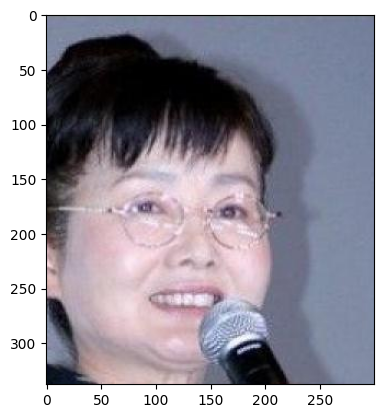

In [ ]:
img=cv2.imread('/content/drive/MyDrive/Project/All-Age-Faces Dataset/original images/06961A64.jpg') #85번째 경로의 이미지 불러오기
img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB) #pyplot에서 보기위해서 BGR을 RGB로 변환
plt.imshow(img)
plt.show() #pyplot으로 보기기

In [ ]:
remomve_list=[]
for i in range(13322):
  img=cv2.imread(train_path[i])
  if (img[0][0][0]==img[0][0][1]==img[0][0][2] and img[5][5][0]==img[5][5][1]==img[5][5][2] and img[15][15][0]==img[15][15][1]==img[15][15][2] and img[35][35][0]==img[35][35][1]==img[35][35][2]): #특정 픽셀값들의 RGB값이 같을시 흑백사진이라고 판단
    remomve_list.append(i) #흑백사진의 인덱스를 리스트에 추가
  if i%100==0:
    print(i)

print(remomve_list)

0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000
5100
5200
5300
5400
5500
5600
5700
5800
5900
6000
6100
6200
6300
6400
6500
6600
6700
6800
6900
7000
7100
7200
7300
7400
7500
7600
7700
7800
7900
8000
8100
8200
8300
8400
8500
8600
8700
8800
8900
9000
9100
9200
9300
9400
9500
9600
9700
9800
9900
10000
10100
10200
10300
10400
10500
10600
10700
10800
10900
11000
11100
11200
11300
11400
11500
11600
11700
11800
11900
12000
12100
12200
12300
12400
12500
12600
12700
12800
12900
13000
13100
13200
13300
[2, 6, 22, 85, 86, 105, 112, 128, 135, 141, 155, 156, 161, 183, 192, 197, 209, 219, 245, 246, 281, 290, 292, 293, 295, 298, 302, 303, 313, 326, 328, 329, 331, 367, 372, 375, 379, 385, 386, 394, 408, 412, 426, 430, 436, 437, 438, 443, 455, 457, 460, 461, 470, 481, 482, 483, 512, 517, 523, 536, 538, 558, 563,

In [ ]:
remove_idx=[2, 6, 22, 85, 86, 105, 112, 128, 135, 141, 155, 156, 161, 183, 192, 197, 209, 219, 245, 246, 281, 290, 292, 293, 295, 298, 302, 303, 313, 326, 328, 329, 331, 367, 372, 375, 379, 385, 386, 394, 408, 412, 426, 430, 436, 437, 438, 443, 455, 457, 460, 461, 470, 481, 482, 483, 512, 517, 523, 536, 538, 558, 563, 579, 585, 596, 631, 632, 633, 638, 639, 640, 646, 649, 665, 666, 668, 703, 708, 720, 729, 746, 769, 776, 778, 782, 788, 790, 805, 808, 813, 814, 816, 833, 842, 855, 858, 880, 882, 915, 916, 919, 962, 966, 968, 972, 974, 988, 990, 999, 1006, 1022, 1027, 1040, 1088, 1119, 1120, 1133, 1141, 1159, 1171, 1189, 1195, 1210, 1212, 1215, 1234, 1240, 1262, 1280, 1288, 1300, 1308, 1329, 1332, 1357, 1374, 1375, 1380, 1386, 1472, 1508, 1534, 1540, 1570, 1588, 1593, 1602, 1609, 1614, 1625, 1659, 1665, 1676, 1692, 1722, 1730, 1739, 1757, 1778, 1781, 1785, 1829, 1834, 1840, 1854, 1857, 1876, 1884, 1889, 1894, 1896, 1915, 1957, 1984, 2015, 2030, 2042, 2047, 2048, 2077, 2083, 2105, 2111, 2114, 2118, 2138, 2156, 2231, 2236, 2256, 2274, 2292, 2351, 2403, 2407, 2416, 2420, 2427, 2443, 2447, 2462, 2503, 2510, 2544, 2552, 2557, 2576, 2579, 2594, 2597, 2604, 2607, 2637, 2643, 2658, 2738, 2744, 2758, 2791, 2799, 2835, 2854, 2870, 2961, 2977, 3028, 3048, 3087, 3100, 3129, 3131, 3136, 3137, 3143, 3144, 3150, 3162, 3198, 3210, 3224, 3236, 3245, 3329, 3335, 3336, 3369, 3373, 3381, 3407, 3473, 3491, 3496, 3530, 3553, 3565, 3574, 3580, 3582, 3594, 3599, 3610, 3619, 3633, 3679, 3683, 3689, 3699, 3708, 3712, 3713, 3717, 3725, 3757, 3763, 3774, 3791, 3799, 3833, 3870, 3874, 3933, 3936, 3949, 3970, 3981, 3994, 4009, 4015, 4033, 4038, 4093, 4129, 4146, 4147, 4149, 4172, 4174, 4182, 4185, 4189, 4210, 4256, 4260, 4296, 4298, 4304, 4369, 4371, 4376, 4414, 4511, 4514, 4519, 4532, 4551, 4558, 4577, 4584, 4598, 4612, 4613, 4624, 4663, 4672, 4682, 4685, 4687, 4696, 4725, 4735, 4745, 4760, 4774, 4785, 4787, 4788, 4806, 4818, 4831, 4834, 4843, 4848, 4858, 4859, 4873, 4874, 4883, 4886, 4897, 4900, 4901, 4910, 4915, 4945, 4950, 4952, 4956, 4960, 4964, 5000, 5001, 5002, 5014, 5020, 5023, 5025, 5042, 5044, 5084, 5094, 5150, 5158, 5168, 5266, 5278, 5284, 5295, 5331, 5333, 5351, 5354, 5359, 5361, 5365, 5369, 5416, 5437, 5441, 5457, 5477, 5480, 5483, 5518, 5540, 5547, 5561, 5570, 5587, 5591, 5592, 5607, 5622, 5623, 5624, 5643, 5659, 5667, 5687, 5699, 5701, 5708, 5709, 5720, 5732, 5755, 5757, 5759, 5763, 5772, 5780, 5785, 5788, 5801, 5811, 5833, 5859, 5861, 5862, 5910, 5920, 5932, 5949, 5961, 5999, 6002, 6019, 6036, 6060, 6062, 6063, 6065, 6069, 6074, 6133, 6168, 6183, 6224, 6225, 6230, 6235, 6260, 6263, 6269, 6273, 6302, 6306, 6313, 6334, 6344, 6354, 6362, 6368, 6372, 6384, 6406, 6415, 6425, 6433, 6440, 6441, 6442, 6446, 6447, 6449, 6455, 6459, 6469, 6474, 6475, 6492, 6496, 6499, 6500, 6505, 6506, 6523, 6525, 6570, 6576, 6579, 6606, 6614, 6615, 6616, 6628, 6645, 6656, 6660, 6668, 6675, 6678, 6702, 6728, 6731, 6743, 6766, 6779, 6783, 6786, 6790, 6803, 6816, 6831, 6836, 6837, 6854, 6868, 6888, 6900, 6901, 6905, 6925, 6943, 6959, 6960, 6965, 6971, 6972, 6973, 6974, 6975, 6978, 6986, 7004, 7006, 7010, 7012, 7016, 7021, 7022, 7038, 7053, 7063, 7072, 7082, 7083, 7085, 7090, 7092, 7093, 7100, 7116, 7120, 7128, 7155, 7159, 7165, 7166, 7171, 7181, 7182, 7195, 7199, 7202, 7203, 7206, 7208, 7212, 7222, 7226, 7229, 7240, 7245, 7251, 7256, 7258, 7266, 7267, 7275, 7287, 7289, 7312, 7315, 7328, 7329, 7340, 7344, 7354, 7355, 7356, 7357, 7359, 7360, 7362, 7372, 7377, 7387, 7396, 7401, 7417, 7425, 7426, 7435, 7436, 7446, 7449, 7460, 7461, 7473, 7484, 7485, 7486, 7499, 7515, 7518, 7519, 7532, 7536, 7548, 7570, 7578, 7585, 7589, 7592, 7596, 7611, 7624, 7626, 7627, 7629, 7633, 7636, 7641, 7642, 7643, 7645, 7653, 7655, 7659, 7662, 7685, 7686, 7692, 7699, 7712, 7716, 7721, 7731, 7744, 7746, 7756, 7765, 7766, 7768, 7772, 7773, 7776, 7787, 7788, 7796, 7808, 7810, 7813, 7819, 7820, 7821, 7824, 7828, 7832, 7843, 7849, 7858, 7860, 7863, 7874, 7889, 7911, 7931, 7940, 7942, 7944, 7950, 7957, 7959, 7960, 7966, 7969, 7970, 7972, 7973, 7989, 8001, 8002, 8007, 8009, 8011, 8019, 8025, 8034, 8045, 8053, 8057, 8058, 8076, 8077, 8085, 8086, 8089, 8093, 8103, 8118, 8122, 8166, 8187, 8202, 8203, 8207, 8209, 8211, 8221, 8234, 8235, 8246, 8252, 8259, 8279, 8291, 8294, 8300, 8301, 8304, 8306, 8353, 8354, 8356, 8358, 8360, 8364, 8394, 8410, 8415, 8428, 8433, 8443, 8446, 8453, 8457, 8505, 8538, 8548, 8553, 8613, 8614, 8625, 8626, 8628, 8633, 8634, 8665, 8688, 8708, 8709, 8741, 8751, 8752, 8756, 8763, 8805, 8813, 8818, 8829, 8833, 8834, 8838, 8867, 8886, 8914, 8915, 8925, 8936, 8938, 8942, 8951, 8967, 8983, 9009, 9012, 9021, 9050, 9090, 9091, 9093, 9103, 9106, 9145, 9186, 9196, 9203, 9211, 9224, 9254, 9268, 9307, 9330, 9331, 9334, 9338, 9339, 9356, 9359, 9390, 9407, 9427, 9450, 9454, 9462, 9465, 9468, 9474, 9482, 9484, 9499, 9512, 9516, 9526, 9532, 9537, 9555, 9556, 9559, 9572, 9574, 9577, 9590, 9647, 9652, 9713, 9733, 9736, 9738, 9750, 9771, 9814, 9819, 9869, 9888, 9900, 9916, 9920, 9924, 9925, 9935, 9965, 9987, 9990, 10054, 10066, 10104, 10111, 10117, 10119, 10123, 10143, 10150, 10156, 10160, 10161, 10166, 10186, 10193, 10198, 10203, 10237, 10282, 10284, 10285, 10300, 10309, 10338, 10343, 10344, 10366, 10375, 10385, 10400, 10401, 10404, 10411, 10412, 10416, 10422, 10425, 10427, 10434, 10436, 10462, 10470, 10474, 10477, 10498, 10500, 10514, 10518, 10526, 10534, 10550, 10553, 10565, 10594, 10603, 10626, 10628, 10653, 10690, 10705, 10710, 10720, 10721, 10729, 10737, 10745, 10775, 10790, 10795, 10797, 10801, 10816, 10823, 10825, 10828, 10838, 10841, 10851, 10857, 10863, 10864, 10865, 10872, 10879, 10891, 10893, 10905, 10920, 10922, 10924, 10935, 10950, 10962, 10981, 10990, 10991, 11001, 11008, 11057, 11058, 11076, 11095, 11113, 11146, 11148, 11181, 11182, 11191, 11211, 11223, 11246, 11258, 11263, 11266, 11272, 11286, 11294, 11314, 11331, 11336, 11351, 11355, 11358, 11360, 11369, 11374, 11375, 11397, 11399, 11415, 11418, 11428, 11430, 11445, 11447, 11456, 11493, 11495, 11496, 11501, 11506, 11515, 11521, 11527, 11529, 11543, 11547, 11563, 11568, 11610, 11615, 11619, 11622, 11629, 11630, 11632, 11634, 11644, 11646, 11647, 11657, 11658, 11678, 11683, 11684, 11686, 11718, 11730, 11751, 11753, 11757, 11759, 11773, 11776, 11789, 11822, 11828, 11830, 11835, 11846, 11847, 11848, 11875, 11899, 11903, 11906, 11910, 11917, 11932, 11936, 11937, 11946, 11973, 11974, 11976, 11977, 11982, 11986, 11993, 12003, 12008, 12011, 12012, 12013, 12014, 12015, 12016, 12017, 12018, 12020, 12040, 12053, 12060, 12064, 12087, 12089, 12090, 12103, 12111, 12113, 12118, 12122, 12133, 12146, 12152, 12153, 12155, 12156, 12169, 12171, 12174, 12176, 12178, 12179, 12187, 12191, 12193, 12194, 12198, 12207, 12226, 12227, 12229, 12231, 12236, 12243, 12246, 12249, 12251, 12262, 12264, 12273, 12274, 12279, 12297, 12298, 12299, 12300, 12302, 12308, 12315, 12319, 12320, 12328, 12336, 12337, 12346, 12347, 12350, 12355, 12358, 12371, 12379, 12381, 12397, 12404, 12421, 12429, 12431, 12439, 12441, 12446, 12448, 12452, 12456, 12468, 12470, 12481, 12488, 12490, 12492, 12493, 12495, 12507, 12517, 12534, 12537, 12544, 12545, 12553, 12554, 12555, 12556, 12557, 12558, 12559, 12560, 12562, 12566, 12567, 12568, 12569, 12572, 12575, 12609, 12625, 12628, 12630, 12632, 12653, 12665, 12670, 12677, 12682, 12684, 12711, 12714, 12718, 12741, 12747, 12756, 12769, 12779, 12794, 12809, 12812, 12819, 12820, 12829, 12833, 12837, 12842, 12859, 12868, 12872, 12875, 12883, 12898, 12901, 12946, 12952, 12958, 12960, 12961, 12983, 12993, 13002, 13005, 13006, 13013, 13021, 13022, 13036, 13042, 13072, 13081, 13111, 13117, 13118, 13123, 13125, 13129, 13133, 13138, 13146, 13150, 13151, 13158, 13177, 13184, 13185, 13208, 13218, 13228, 13229, 13245, 13251, 13256, 13262, 13266, 13273, 13274, 13279, 13283, 13301, 13310]
#위의 셀에서 추출한 인덱스 대입
print("삭제하기전 2번째 인덱스 값",train_path[2])
for idx in sorted(remove_idx, reverse = True):
    del train_path[idx] #인덱스값으로 경로중 일부 제거

print(len(train_path))
print("삭제한 후 2번째 인덱스 값",train_path[2])

삭제하기전 2번째 인덱스 값 /content/drive/MyDrive/Project/All-Age-Faces Dataset/original images/00002A02.jpg
12070
삭제한 후 2번째 인덱스 값 /content/drive/MyDrive/Project/All-Age-Faces Dataset/original images/00003A02.jpg


In [ ]:
face_list=[]
image_list=[]
num=0
i=0
non_recognition_idx=[]
for person in train_path:
  image =fr.load_image_file(person)#넘파이로 이미지 불러들임임
  encodings = fr.face_encodings(image)
  if len(encodings) > 0:
      biden_encoding = encodings[0]
      top,right,bottom,left = fr.face_locations(image)[0]
      face_image = image[top:bottom,left:right]
      face_list.append(face_image)
  else:
      non_recognition_idx.append(i)
      num=num+1
  i=i+1
  if i%100==0:
    print(i)

print("얼굴 인식한 이미지수 : ",len(train_path)-num)
print(non_recognition_idx)
for idx in sorted(non_recognition_idx, reverse = True):
    del train_path[idx] #인덱스값으로 경로중 일부 제거
print(len(train_path))

100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000
5100
5200
5300
5400
5500
5600
5700
5800
5900
6000
6100
6200
6300
6400
6500
6600
6700
6800
6900
7000
7100
7200
7300
7400
7500
7600
7700
7800
7900
8000
8100
8200
8300
8400
8500
8600
8700
8800
8900
9000
9100
9200
9300
9400
9500
9600
9700
9800
9900
10000
10100
10200
10300
10400
10500
10600
10700
10800
10900
11000
11100
11200
11300
11400
11500
11600
11700
11800
11900
12000
얼굴 인식한 이미지수 :  11829
[55, 68, 99, 102, 215, 222, 260, 317, 329, 480, 527, 603, 607, 626, 633, 642, 664, 727, 752, 825, 834, 841, 864, 892, 897, 915, 923, 932, 956, 959, 1079, 1128, 1153, 1164, 1189, 1219, 1253, 1285, 1288, 1290, 1298, 1301, 1380, 1390, 1413, 1420, 1423, 1438, 1465, 1530, 1542, 1544, 1579, 1588, 1623, 1624, 1626, 1669, 1707, 1768, 1769, 1837, 1911, 1913, 1973, 2018, 204

In [ ]:
print(train_path)

['/content/drive/MyDrive/Project/All-Age-Faces Dataset/original images/00000A02.jpg', '/content/drive/MyDrive/Project/All-Age-Faces Dataset/original images/00001A02.jpg', '/content/drive/MyDrive/Project/All-Age-Faces Dataset/original images/00003A02.jpg', '/content/drive/MyDrive/Project/All-Age-Faces Dataset/original images/00004A02.jpg', '/content/drive/MyDrive/Project/All-Age-Faces Dataset/original images/00005A02.jpg', '/content/drive/MyDrive/Project/All-Age-Faces Dataset/original images/00007A02.jpg', '/content/drive/MyDrive/Project/All-Age-Faces Dataset/original images/00008A02.jpg', '/content/drive/MyDrive/Project/All-Age-Faces Dataset/original images/00009A02.jpg', '/content/drive/MyDrive/Project/All-Age-Faces Dataset/original images/00010A02.jpg', '/content/drive/MyDrive/Project/All-Age-Faces Dataset/original images/00011A02.jpg', '/content/drive/MyDrive/Project/All-Age-Faces Dataset/original images/00012A02.jpg', '/content/drive/MyDrive/Project/All-Age-Faces Dataset/original i

In [ ]:
file_name = []
gender_info=[]
for id in train_path:
  if id.count("A") == 3:
    name = id.split('A')[3]
    name=name.split('.')[0]
    file_name.append(name) #파일명의 3번째 A와 .사이의 나이정보를 label로 설정
    # Count the number of '/' characters to determine the correct index
    num_slashes = id.count('/')
    # Adjust the index based on the number of slashes
    gender_index = num_slashes - 2  # Assuming gender is two levels up from the file
    gender = id.split('/')[gender_index].split('A')[0]  # Extract gender
    # Check if gender is not empty before appending
    if gender:
      gender_info.append(gender)#gender id저장
label_list=list(map(int, file_name)) #str형태를 int로 변경

# Filter out empty strings before converting to integers
gender_info_filtered = [g for g in gender_info if g]
gender_id=list(map(int, gender_info_filtered))#str형태를 int로 변경

print(label_list)
print(len(label_list))
train_y=label_list

[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 

In [ ]:
### 잠시 대기 코드 ###

file_name = []
gender_info=[]
for id in train_path:
  if id.count("A") == 3:
    name = id.split('A')[3]
    name=name.split('.')[0]
    file_name.append(name) #파일명의 3번째 A와 .사이의 나이정보를 label로 설정
    gender=id.split('/')[7]
    gender=gender.split('A')[0]
    gender_info.append(gender)#gender id저장장
label_list=list(map(int, file_name)) #str형태를 int로 변경
gender_id=list(map(int, gender_info))#str형태를 int로 변경
print(label_list)
print(len(label_list))
train_y=label_list

[47, 22, 28, 33, 22, 60, 72, 49, 24, 43, 51, 26, 53, 59, 21, 23, 62, 34, 27, 46, 22, 5, 42, 22, 67, 24, 32, 34, 37, 49, 23, 31, 37, 2, 64, 36, 24, 30, 49, 58, 39, 74, 55, 74, 76, 41, 17, 29, 61, 13, 32, 17, 42, 6, 47, 32, 40, 50, 34, 32, 10, 35, 49, 20, 39, 9, 57, 37, 46, 31, 24, 36, 34, 60, 26, 43, 6, 15, 46, 40, 29, 27, 29, 37, 30, 35, 22, 39, 42, 53, 36, 49, 32, 73, 57, 79, 33, 47, 41, 40, 39, 16, 55, 56, 58, 15, 29, 12, 34, 49, 57, 33, 27, 80, 31, 49, 12, 12, 31, 51, 33, 3, 55, 24, 36, 37, 5, 35, 42, 7, 6, 43, 38, 50, 38, 27, 55, 30, 35, 73, 36, 18, 26, 40, 31, 32, 2, 66, 7, 26, 4, 22, 42, 26, 43, 27, 37, 20, 47, 29, 42, 14, 29, 44, 68, 26, 56, 29, 29, 11, 25, 14, 21, 5, 41, 7, 32, 52, 80, 36, 45, 63, 42, 21, 5, 41, 61, 32, 69, 6, 32, 25, 13, 50, 64, 30, 21, 38, 13, 19, 51, 56, 36, 22, 41, 28, 32, 43, 36, 63, 55, 40, 50, 57, 53, 47, 27, 35, 28, 19, 22, 32, 46, 45, 52, 34, 10, 12, 28, 40, 31, 36, 6, 59, 31, 2, 45, 27, 13, 56, 33, 37, 43, 35, 31, 2, 22, 20, 43, 10, 46, 35, 61, 22, 66

In [ ]:
age_label=[]
for i in range(2,81):
  age_label.append(i)

In [ ]:
num_age=[]
from collections import Counter

result = Counter(train_y)
print(result)

for key in result:
    print(key, result[key])

for i in range(2,81):
  num_age.append(result[i])
print(num_age)

Counter({27: 456, 29: 421, 32: 400, 33: 385, 26: 372, 28: 359, 31: 330, 34: 326, 36: 321, 35: 313, 37: 292, 30: 287, 25: 260, 24: 254, 41: 249, 40: 234, 42: 231, 39: 220, 23: 216, 38: 211, 43: 210, 22: 195, 45: 188, 46: 171, 21: 164, 47: 158, 20: 156, 44: 155, 18: 145, 49: 142, 2: 133, 19: 131, 56: 130, 48: 127, 13: 119, 55: 117, 9: 115, 17: 112, 6: 110, 3: 109, 4: 109, 50: 108, 7: 103, 51: 101, 15: 101, 12: 101, 5: 100, 8: 99, 60: 97, 59: 96, 14: 96, 54: 96, 57: 95, 53: 93, 10: 93, 61: 90, 16: 88, 52: 88, 11: 82, 63: 77, 67: 68, 58: 66, 69: 66, 66: 62, 62: 56, 64: 52, 78: 50, 76: 45, 68: 45, 77: 44, 74: 42, 80: 42, 71: 42, 65: 42, 73: 40, 70: 40, 79: 36, 75: 30, 72: 24})
47 158
22 195
28 359
33 385
60 97
72 24
49 142
24 254
43 210
51 101
26 372
53 93
59 96
21 164
23 216
62 56
34 326
27 456
46 171
5 100
42 231
67 68
32 400
37 292
31 330
2 133
64 52
36 321
30 287
58 66
39 220
74 42
55 117
76 45
41 249
17 112
29 421
61 90
13 119
6 110
40 234
50 108
10 93
35 313
20 156
9 115
57 95
15 101


In [ ]:
num_gender=[]
male=0
female=0
for value in gender_id:
  if value<7381:
    female+=1
  else:
    male+=1
num_gender.append(male)
num_gender.append(female)
print(num_gender)

[5197, 6632]


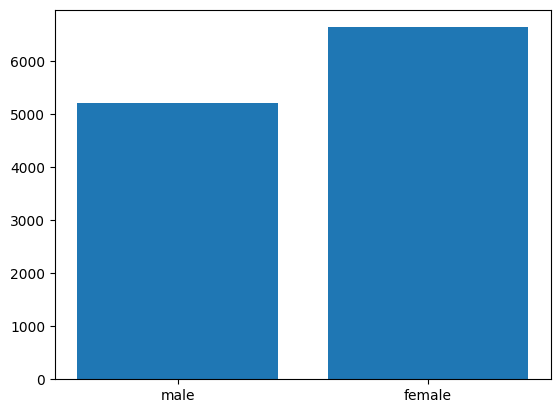

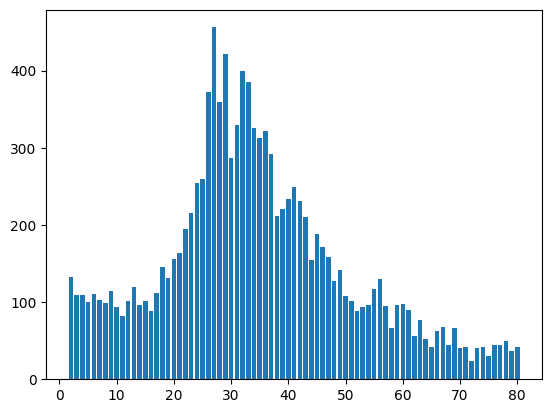

In [ ]:
plt.figure()
# 각 x축 데이터 지점에 y축 데이터의 길이의 막대를 그린다.
plt.bar(["male","female"], num_gender) #x축 y축
plt.show()

plt.figure()
# 각 x축 데이터 지점에 y축 데이터의 길이의 막대를 그린다.
plt.bar(age_label, num_age) #x축 y축
plt.show()

In [ ]:
train_y=[]
for i in range(len(label_list)): #정확도 향상을 위해 나이를 생애주기별 요약
  if label_list[i]<15:
    train_y.append(0)
  elif label_list[i]<30:
    train_y.append(1)
  elif label_list[i]<50:
    train_y.append(2)
  else:
    train_y.append(3)
print(train_y)
print(len(train_y))

[2, 1, 1, 2, 1, 3, 3, 2, 1, 2, 3, 1, 3, 3, 1, 1, 3, 2, 1, 2, 1, 0, 2, 1, 3, 1, 2, 2, 2, 2, 1, 2, 2, 0, 3, 2, 1, 2, 2, 3, 2, 3, 3, 3, 3, 2, 1, 1, 3, 0, 2, 1, 2, 0, 2, 2, 2, 3, 2, 2, 0, 2, 2, 1, 2, 0, 3, 2, 2, 2, 1, 2, 2, 3, 1, 2, 0, 1, 2, 2, 1, 1, 1, 2, 2, 2, 1, 2, 2, 3, 2, 2, 2, 3, 3, 3, 2, 2, 2, 2, 2, 1, 3, 3, 3, 1, 1, 0, 2, 2, 3, 2, 1, 3, 2, 2, 0, 0, 2, 3, 2, 0, 3, 1, 2, 2, 0, 2, 2, 0, 0, 2, 2, 3, 2, 1, 3, 2, 2, 3, 2, 1, 1, 2, 2, 2, 0, 3, 0, 1, 0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 0, 1, 2, 3, 1, 3, 1, 1, 0, 1, 0, 1, 0, 2, 0, 2, 3, 3, 2, 2, 3, 2, 1, 0, 2, 3, 2, 3, 0, 2, 1, 0, 3, 3, 2, 1, 2, 0, 1, 3, 3, 2, 1, 2, 1, 2, 2, 2, 3, 3, 2, 3, 3, 3, 2, 1, 2, 1, 1, 1, 2, 2, 2, 3, 2, 0, 0, 1, 2, 2, 2, 0, 3, 2, 0, 2, 1, 0, 3, 2, 2, 2, 2, 2, 0, 1, 1, 2, 0, 2, 2, 3, 1, 3, 3, 1, 2, 1, 1, 1, 1, 2, 3, 1, 3, 2, 2, 3, 3, 2, 2, 0, 2, 3, 0, 2, 1, 1, 1, 1, 3, 0, 1, 1, 3, 2, 3, 1, 2, 2, 2, 1, 3, 2, 2, 2, 2, 2, 2, 3, 2, 2, 1, 2, 1, 3, 2, 1, 1, 3, 1, 3, 2, 1, 3, 1, 1, 1, 1, 1, 2, 3, 1, 0, 0, 2, 1, 2, 0, 1, 1, 2, 

Counter({2: 4950, 1: 3430, 3: 2080, 0: 1369})
2 4950
1 3430
3 2080
0 1369
[1369, 3430, 4950, 2080]


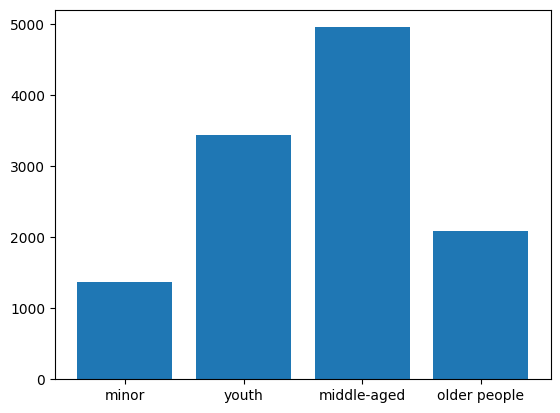

In [ ]:
num_label=[]
from collections import Counter

result = Counter(train_y)
print(result)

for key in result:
    print(key, result[key])

for i in range(0,4):
  num_label.append(result[i])
print(num_label)
plt.bar(["minor","youth","middle-aged","older people"], num_label) #x축 y축
plt.show()

In [ ]:
len(face_list)*0.8 #총 데이터수 갯수*0.8 파악

9463.2

In [ ]:
import random
random.Random(19991006).shuffle(face_list) #시드 고정후 셔플
random.Random(19991006).shuffle(train_path) #시드 고정후 셔플
random.Random(19991006).shuffle(train_y) #시드 고정후 셔플
train_img_list=face_list[:9463] #0.8비율로 trainset과 validationset으로 스플릿
train_label_list=train_y[:9463]
valid_img_list=face_list[9463:]
valid_label_list=train_y[9463:]

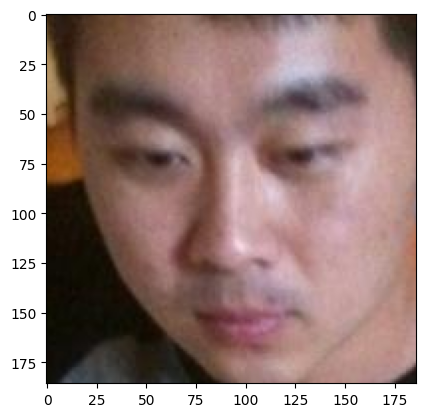

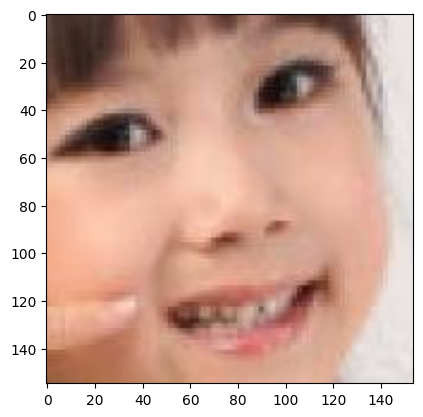

In [ ]:
plt.imshow(valid_img_list[1])
plt.show()
plt.imshow(valid_img_list[2])
plt.show()

In [ ]:
def make_weights(labels, nclasses):
    labels = np.array(labels)
    weight_arr = np.zeros_like(labels)

    _, counts = np.unique(labels, return_counts=True)
    for cls in range(nclasses):
        weight_arr = np.where(labels == cls, 1/counts[cls], weight_arr)
        # 각 클래스의의 인덱스를 산출하여 해당 클래스 개수의 역수를 확률로 할당한다.
        # 이를 통해 각 클래스의 전체 가중치를 동일하게 한다.

    return weight_arr
weights = make_weights(train_label_list, 4)
weights = torch.DoubleTensor(weights)
print(weights)
print(weights.shape)
weights1 = make_weights(valid_label_list, 4)
weights1 = torch.DoubleTensor(weights1)
print(weights1)
print(weights1.shape)

tensor([0.0009, 0.0003, 0.0004,  ..., 0.0003, 0.0009, 0.0004],
       dtype=torch.float64)
torch.Size([9463])
tensor([0.0036, 0.0015, 0.0036,  ..., 0.0023, 0.0015, 0.0036],
       dtype=torch.float64)
torch.Size([2366])


In [ ]:
sampler = torch.utils.data.sampler.WeightedRandomSampler(weights, len(weights))
sampler1 = torch.utils.data.sampler.WeightedRandomSampler(weights1, len(weights1))

In [ ]:
### 잠시 대기 코드 ###

class ageDataset(Dataset):
    def __init__(self, image,label, train=True, transform=None):
        self.transform = transform
        self.img_list = image
        self.label_list=label
    def __len__(self):
        return len(self.img_list)
    def __getitem__(self, idx):
        label = self.label_list[idx]
        img = Image.fromarray(np.uint8(self.img_list[idx])).convert('RGB')
        if self.transform is not None:
            img = self.transform(img)
        return img, label

In [ ]:
original_dataset = ageDataset(image=train_img_list,label=train_label_list, train=True, transform=train_transform) #original dataset 구축
Horizontal_dataset=ageDataset(image=train_img_list,label=train_label_list, train=True, transform=Horizontal_transform) #horizonal dataset 구축
train_dataset=original_dataset+Horizontal_dataset
train_loader = DataLoader(train_dataset, batch_size = CFG['BATCH_SIZE'], num_workers=2,sampler=sampler) #dataloadet 대입



valid_dataset= ageDataset(image=valid_img_list,label=valid_label_list, train=False, transform=test_transform)  #validation custom dataset 구축
valid_loader = DataLoader(valid_dataset, batch_size = CFG['BATCH_SIZE'], num_workers=2,sampler=sampler1) #dataloadet 대입

In [ ]:
model1=torchvision.models.resnet18(torchvision.models.ResNet18_Weights)
print(model1)
model1.fc = nn.Sequential(
    nn.Linear(512,512),
    nn.ReLU(),
    nn.Dropout(0.3),
    nn.Linear(512,4),
    nn.Softmax()
)
model1=model1.to(device)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:135: UserWarning: Using 'weights' as positional parameter(s) is deprecated since 0.13 and may be removed in the future. Please use keyword parameter(s) instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [ ]:
criterion = torch.nn.CrossEntropyLoss() #loss function으로 crossentropy 설정
optimizer=optim.Adam(model1.parameters(),lr=1e-4,weight_decay=1e-4) #최적화 함수로 Adam사용
scheduler = None

In [ ]:
def train(model, optimizer, train_loader,vali_loader, scheduler, device):  #학습 함수정의
    model.to(device) #모델에 디바이스 할당
    n = len(train_loader) #데이터 갯수 파악악

    #Loss Function 정의
    #criterion = nn.CrossEntropyLoss().to(device)
    best_acc = 0
    vali_acc=0
    best_apoch=0
    val_loss=[]
    tr_loss=[]
    for epoch in range(1,CFG["EPOCHS"]+1): #에포크 설정
        model.train() #모델 학습
        running_loss = 0.0

        for img, label in tqdm(iter(train_loader)):
            img, label = img.to(device), label.to(device) #배치 데이터
            optimizer.zero_grad() #배치마다 optimizer 초기화

            # Data -> Model -> Output
            logit = model(img) #예측값 산출
            loss = criterion(logit, label) #손실함수 계산

            # 역전파
            loss.backward() #손실함수 기준 역전파
            optimizer.step() #가중치 최적화
            running_loss += loss.item()
            train_loss=running_loss / len(train_loader)
        print('[%d] Train loss: %.10f' %(epoch, running_loss / len(train_loader)))
        tr_loss.append(running_loss / len(train_loader))
        if scheduler is not None:
          scheduler.step()
        #Validation set 평가
        model.eval() #evaluation 과정에서 사용하지 않아야 하는 layer들을 알아서 off 시키도록 하는 함수
        vali_loss = 0.0
        correct = 0
        with torch.no_grad(): #파라미터 업데이트 안하기 때문에 no_grad 사용
            for img, label in tqdm(iter(vali_loader)):
                img, label = img.to(device), label.to(device)

                logit = model(img)
                vali_loss += criterion(logit, label)
                pred = logit.argmax(dim=1, keepdim=True)  #4개의 class중 가장 값이 높은 것을 예측 label로 추출
                correct += pred.eq(label.view_as(pred)).sum().item() #예측값과 실제값이 맞으면 1 아니면 0으로 합산
        vali_acc = 100 * correct / len(vali_loader.dataset)
        print('Vail set: Loss: {:.4f}, Accuracy: {}/{} ( {:.1f}%)\n'.format(vali_loss / len(vali_loader), correct, len(vali_loader.dataset), 100 * correct / len(vali_loader.dataset)))
        val_loss.append(vali_loss / len(vali_loader))
        if best_acc < vali_acc: #early stopping기법 validation의 정확도가 최고치 갱신시 모델 저장장
            best_acc = vali_acc
            best_epoch=epoch
            torch.save(model.state_dict(), '/content/drive/MyDrive/All-Age-Faces Dataset/best_model.pth') #이 디렉토리에 best_model.pth을 저장
            print('Model Saved.')


    return best_acc,tr_loss,val_loss

In [ ]:
best_acc,tr_loss,val_loss=train(model1, optimizer, train_loader,valid_loader, scheduler, device) #학습



100%|██████████| 592/592 [00:10<00:00, 57.32it/s]

[1] Train loss: 0.7724024025



100%|██████████| 148/148 [00:02<00:00, 68.30it/s]


Vail set: Loss: 1.0684, Accuracy: 1593/2366 ( 67.3%)

Model Saved.


100%|██████████| 592/592 [00:10<00:00, 57.21it/s]

[2] Train loss: 0.7740136640



100%|██████████| 148/148 [00:02<00:00, 65.54it/s]


Vail set: Loss: 1.0324, Accuracy: 1686/2366 ( 71.3%)

Model Saved.


100%|██████████| 592/592 [00:10<00:00, 56.26it/s]

[3] Train loss: 0.7733758203



100%|██████████| 148/148 [00:02<00:00, 61.91it/s]

Vail set: Loss: 1.0546, Accuracy: 1623/2366 ( 68.6%)




100%|██████████| 592/592 [00:10<00:00, 57.69it/s]

[4] Train loss: 0.7799873711



100%|██████████| 148/148 [00:02<00:00, 66.22it/s]

Vail set: Loss: 1.0401, Accuracy: 1663/2366 ( 70.3%)




100%|██████████| 592/592 [00:10<00:00, 57.84it/s]

[5] Train loss: 0.7771342887



100%|██████████| 148/148 [00:02<00:00, 64.78it/s]


Vail set: Loss: 1.0259, Accuracy: 1687/2366 ( 71.3%)

Model Saved.


 36%|███▌      | 214/592 [00:03<00:06, 58.37it/s]


KeyboardInterrupt: 

In [ ]:
for i in range(len(val_loss)):
  valid_loss.append(val_loss[i].tolist())
print("best_accuracy : ",best_acc)


In [ ]:
plt.figure(1,figsize=(10,6)) #plt 사이즈 설정
plt.xlabel('epoch')
plt.ylabel('loss')
plt.plot(tr_loss[:],c='b',label='train_loss')
plt.plot(valid_loss[:],c='r',label='test_loss')
plt.legend(loc='best')

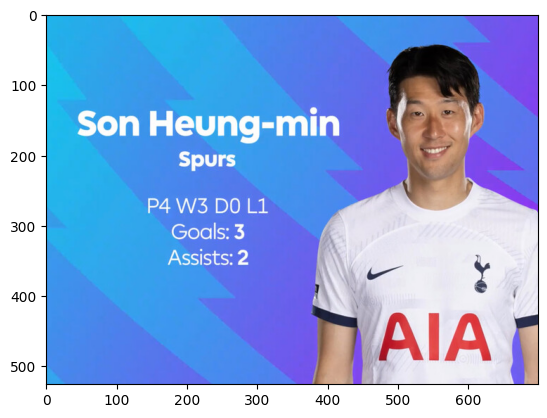

In [ ]:
person=glob.glob('/content/20240405500469.jpg')
img=cv2.imread('/content/20240405500469.jpg')
img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB) #pyplot에서 보기위해서 BGR을 RGB로 변환
plt.imshow(img)
plt.show()

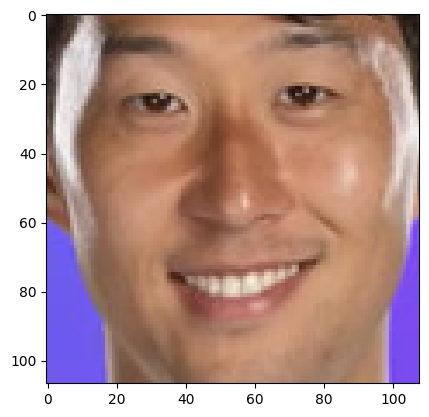

In [ ]:
num=0
i=0
non_recognition_idx=[]
face_image=[]

image =fr.load_image_file(person[0])#넘파이로 이미지 불러들임임
encodings = fr.face_encodings(image)
if len(encodings) > 0:
    biden_encoding = encodings[0]
    top,right,bottom,left = fr.face_locations(image)[0]
    face_image1 = image[top:bottom,left:right]
    face_image.append(face_image1)
else:
    non_recognition_idx.append(i)
    num=num+1
i=i+1

if num==1:
  print("얼굴이 잘 인식되자 않습니다 다른환경에서 사진찍거나 다른사진을 사용해보세요")
else:
  plt.imshow(face_image[0])
  plt.show()

In [ ]:
test_dataset= ageDataset(image=face_image,label=[0], train=False, transform=test_transform)  #validation custom dataset 구축
test_loader = DataLoader(test_dataset, batch_size = CFG['BATCH_SIZE'], num_workers=2) #dataloadet 대입

In [ ]:
check_point=torch.load('/content/drive/MyDrive/All-Age-Faces Dataset/best_model.pth')
model=model1
model=model.to(device)
model.load_state_dict(check_point)

<All keys matched successfully>

In [ ]:
with torch.no_grad(): #파라미터 업데이트 안하기 때문에 no_grad 사용
            for img, label in tqdm(iter(test_loader)):
                img, label = img.to(device), label.to(device)

                logit = model(img)
                pred = logit.argmax(dim=1, keepdim=True)
                print(logit)
                print(pred)

100%|██████████| 1/1 [00:00<00:00,  8.69it/s]

tensor([[0.0732, 0.2031, 0.3970, 0.3267]], device='cuda:0')
tensor([[2]], device='cuda:0')


In [ ]:
pred=pred.tolist()
logit=logit.tolist()
print(logit)
print(pred)

[[0.07319760322570801, 0.20311707258224487, 0.39696308970451355, 0.3267221748828888]]
[[2]]


In [ ]:
if(pred[0][0]==0):
  print("{:.2f}확률로 미성년자입니다.".format(logit[0][pred[0][0]]))
if(pred[0][0]==1):
  print("{:.2f}확률로 청년층입니다.".format(logit[0][pred[0][0]]))
if(pred[0][0]==2):
  print("{:.2f}확률로 중년층입니다.".format(logit[0][pred[0][0]]))
if(pred[0][0]==3):
  print("{:.2f}확률로 노년층자입니다.".format(logit[0][pred[0][0]]))

0.40확률로 중년층입니다.
